### Começaremos agora a implementação dos modelos de regresão e classificação

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
!{sys.executable} -m pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\lucca\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


---

##### 1. Regressão Linear Simples
**Hipótese H1:** Existe uma relação física direta entre a energia e o volume de uma música?
* **Premissa:** Músicas percebidas como "enérgicas" são masterizadas com volumes mais altos (Loudness War).
* **Variáveis:**
    * $X$ (Independente): `energia`
    * $y$ (Alvo): `volume` (dB)



--- H1: REGRESSÃO LINEAR SIMPLES (Energia -> Volume) ---
Intercepto (b): -17.75
Coeficiente Angular (a): 14.86

--- Métricas de Desempenho ---
R² (Explicação da Variância): 0.5838 (Quanto mais perto de 1.0, melhor)
RMSE (Erro Quadrático Médio): 3.08 dB (O modelo erra, em média, essa quantidade)
MAE (Erro Absoluto Médio): 2.21 dB


C:\Users\lucca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


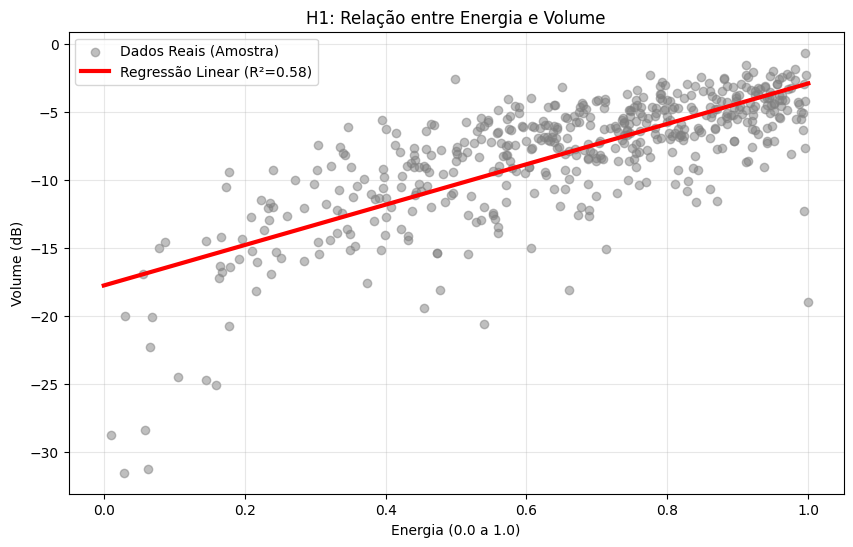

In [9]:
try:
    df = pd.read_csv('..\\data\\processed\\dataset_limpo.csv')
except FileNotFoundError:
    print('Erro ao carregar o dataset')
    
print("--- H1: REGRESSÃO LINEAR SIMPLES (Energia -> Volume) ---")

# 2. Definir Variáveis (X e y)
X = df[['energia']]  # Features (Matriz)
y = df['volume']     # Target (Vetor)

# 3. Divisão Treino vs Teste
# Vamos separar 20% dos dados para "prova final" (teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Criar e Treinar o Modelo
modelo_h1 = LinearRegression()
modelo_h1.fit(X_train, y_train)

# 5. Fazer Previsões (Usando os dados de teste que o modelo nunca viu)
y_pred = modelo_h1.predict(X_test)

# 6. Avaliação do Modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Intercepto (b): {modelo_h1.intercept_:.2f}")
print(f"Coeficiente Angular (a): {modelo_h1.coef_[0]:.2f}")
print(f"\n--- Métricas de Desempenho ---")
print(f"R² (Explicação da Variância): {r2:.4f} (Quanto mais perto de 1.0, melhor)")
print(f"RMSE (Erro Quadrático Médio): {rmse:.2f} dB (O modelo erra, em média, essa quantidade)")
print(f"MAE (Erro Absoluto Médio): {mae:.2f} dB")

# 7. Visualização dos Resultados
plt.figure(figsize=(10, 6))

# Plotar os pontos reais (usamos uma amostra do teste para não pesar o gráfico)
# Pegamos apenas 500 pontos aleatórios para o gráfico ficar legível
indices_amostra = np.random.choice(X_test.index, 500, replace=False)
plt.scatter(df.loc[indices_amostra, 'energia'], df.loc[indices_amostra, 'volume'], 
            color='gray', alpha=0.5, label='Dados Reais (Amostra)')

# Plotar a linha de regressão (usamos todo o range de 0 a 1)
x_range = np.linspace(0, 1, 100).reshape(-1, 1)
y_range = modelo_h1.predict(x_range)
plt.plot(x_range, y_range, color='red', linewidth=3, label=f'Regressão Linear (R²={r2:.2f})')

plt.title('H1: Relação entre Energia e Volume')
plt.xlabel('Energia (0.0 a 1.0)')
plt.ylabel('Volume (dB)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()